<a href="https://colab.research.google.com/github/matildecanete/Prediccion-Enfermedades-Hepaticas/blob/main/Proyecto_Enfermedades_Hepaticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import set_config
set_config(display='diagram')

In [75]:
df = pd.read_csv('/content/drive/MyDrive/Data Science /Dataset/Enfermedades hepáticas/Liver_disease_data.csv')
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [76]:
df_shape = pd.DataFrame({'Filas': [df.shape[0]], 'Columnas': [df.shape[1]]})
print(df_shape.to_string(index=False))

 Filas  Columnas
  1700        11


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


In [78]:
df.isna().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


>No hay valores nulos.

In [79]:
df.duplicated().sum()

np.int64(0)

>No hay valores duplicados.

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1700.0,50.394118,17.641915,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1700.0,0.504118,0.500130,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,1700.0,27.699801,7.210400,15.004710,21.455414,27.925367,33.957668,39.992845
AlcoholConsumption,1700.0,9.832309,5.757472,0.003731,4.841811,9.828195,14.871671,19.952456
Smoking,1700.0,0.291765,0.454708,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1700.0,0.521765,0.666262,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1700.0,5.000993,2.847074,0.001852,2.622121,5.022883,7.401642,9.994964
Diabetes,1700.0,0.142353,0.349515,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,1700.0,0.154706,0.361730,0.000000,0.000000,0.000000,0.000000,1.000000
LiverFunctionTest,1700.0,59.863867,22.996262,20.019254,40.024216,59.513146,79.428755,99.991413


In [81]:
numerical_columns = df.select_dtypes(include=['number']).columns

unique_values = {col: df[col].unique() for col in numerical_columns}
for col, values in unique_values.items():
    print(f"{col}: {values}\n")

Age: [58 71 48 34 62 27 80 40 77 38 42 30 43 72 55 59 22 41 21 63 49 57 79 52
 31 44 68 46 78 61 47 35 66 70 74 76 56 26 28 37 23 33 69 45 39 54 36 25
 73 53 29 50 67 64 60 20 24 32 51 75 65]

Gender: [0 1]

BMI: [35.85758415 30.73247015 19.97140694 ... 38.73001733 35.82079755
 24.06078307]

AlcoholConsumption: [17.27282843  2.20126568 18.50094351 ...  6.32430245 16.89941707
  9.52644704]

Smoking: [0 1]

GeneticRisk: [1 0 2]

PhysicalActivity: [0.65894018 1.67055669 9.92830825 ... 9.31422194 3.2244529  9.26142633]

Diabetes: [0 1]

Hypertension: [0 1]

LiverFunctionTest: [42.73424003 67.3098216  63.73895584 ... 56.05336965 26.30087464
 73.57289293]

Diagnosis: [1 0]



In [82]:
cats = ['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension', 'Diagnosis']
nums = [i for i in df.columns if i not in cats]

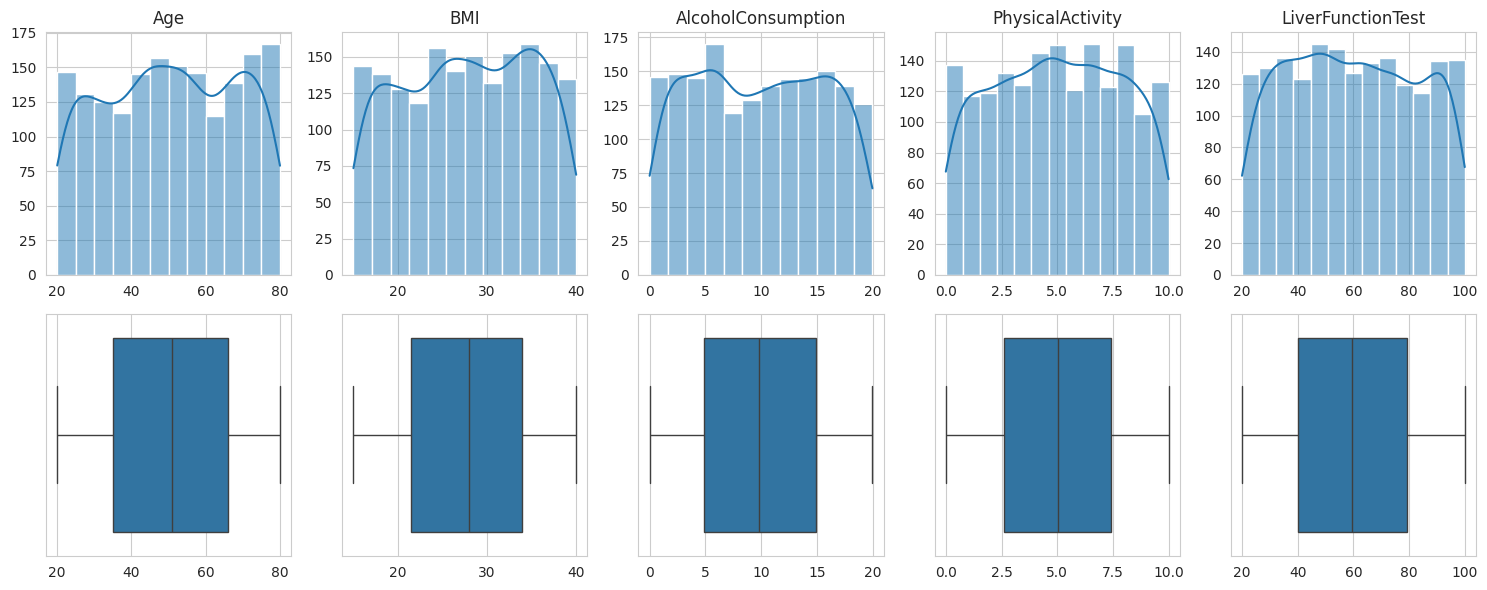

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
sns.set_style('whitegrid')
for i, j in enumerate(nums):
    sns.histplot(df, x=j, kde=True, ax=axes[0][i])
    sns.boxplot(df, x=j, ax=axes[1][i])
    axes[0][i].set_ylabel('')
    axes[0][i].set_xlabel('')
    axes[1][i].set_xlabel('')
    axes[0][i].set_title(j)
plt.tight_layout()
plt.show()

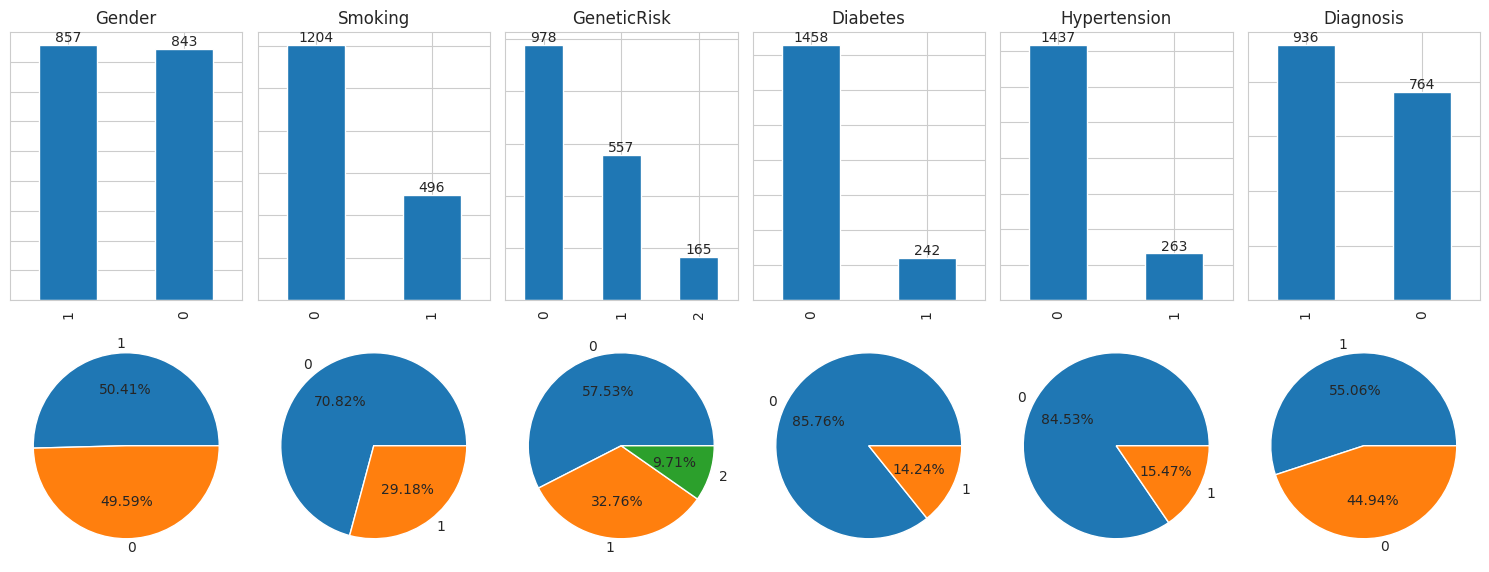

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 6))
sns.set_style('whitegrid')
for i, j in enumerate(cats):
    count = df[j].value_counts()
    count.plot(kind='bar', ax=axes[0][i])
    for container in axes[0][i].containers:
        axes[0][i].bar_label(container)
    axes[0][i].set_yticklabels(())
    axes[0][i].set_title(j)
    axes[0][i].set_ylabel('')
    axes[0][i].set_xlabel('')
    count.plot(kind='pie', ax=axes[1][i], autopct='%0.2f%%')
    axes[1][i].set_ylabel('')
plt.tight_layout()
plt.show()

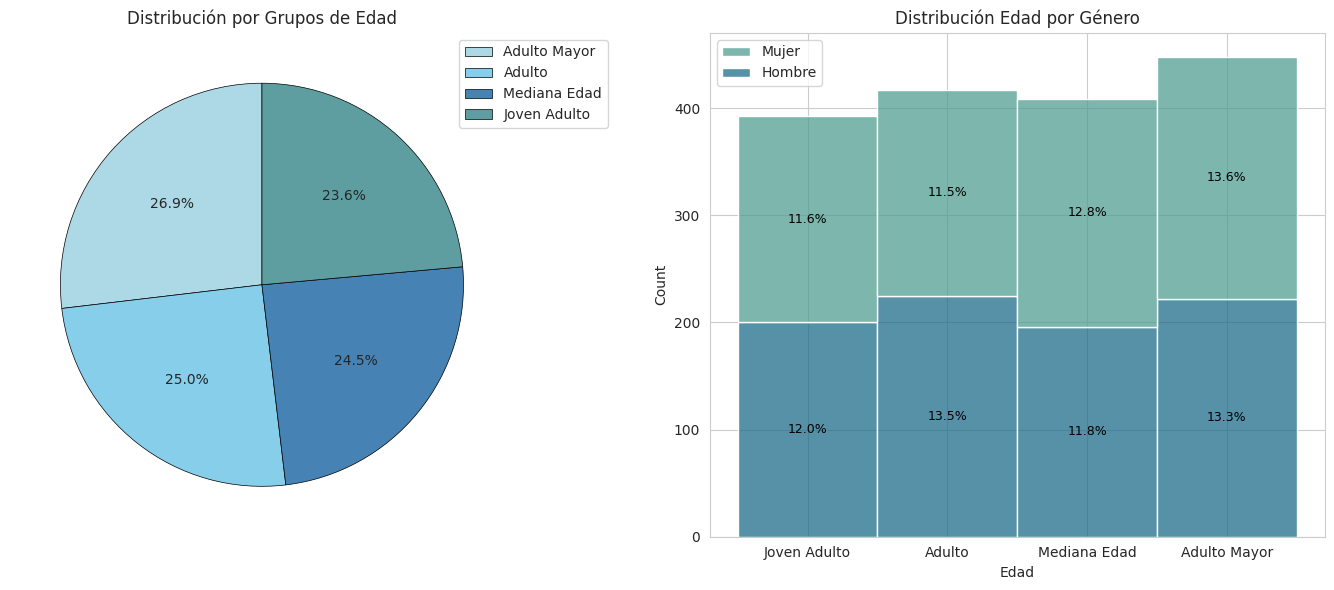

In [85]:
#Nueva columna Age_group
df['Age_group'] = pd.cut(df['Age'], bins=[20, 35, 50, 65, 80], labels=['Joven Adulto', 'Adulto', 'Mediana Edad', 'Adulto Mayor'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set_style('whitegrid')
#Gráfico Distribución por Grupos de Edad
age_group_counts = df['Age_group'].value_counts()
blue_palette = sns.color_palette(["#ADD8E6", "#87CEEB", "#4682B4", "cadetblue"])
axes[0].pie(age_group_counts, labels=None, autopct='%1.1f%%', startangle=90,
            colors=blue_palette, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
axes[0].legend(age_group_counts.index, loc='upper right', bbox_to_anchor=(1.2, 1))
axes[0].set_title('Distribución por Grupos de Edad')
#Histograma Distribución Edad por Género
df['GenderTemp'] = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
sns.set_style('whitegrid')
ax = sns.histplot(data=df, x='Age_group', hue='GenderTemp', multiple='stack', palette='crest', ax=axes[1])
ax.get_legend().set_title(None)

patches = ax.patches
total_height = sum(p.get_height() for p in patches)

from collections import defaultdict
bar_data = defaultdict(lambda: {'heights': [], 'cumulative': 0})

for p in patches:
    x = p.get_x() + p.get_width() / 2
    height = p.get_height()
    bar_data[x]['heights'].append(height)
    bar_data[x]['cumulative'] += height
for x, data in bar_data.items():
    cumulative = 0
    for height in data['heights']:
        percentage = (height / total_height) * 100
        ax.text(x, cumulative + height / 2, f'{percentage:.1f}%',
                ha='center', va='center', fontsize=9, color='black')
        cumulative += height
axes[1].set_title('Distribución Edad por Género')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [86]:
#Distribución BMI
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obeso', 'Obesidad extrema']
df['DivisionBMI'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI', axis=1, inplace=True)
df.head()

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Age_group,GenderTemp,DivisionBMI
0,58,0,17.272828,0,1,0.658940,0,0,42.734240,1,Mediana Edad,Mujer,Obesidad extrema
1,71,1,2.201266,0,1,1.670557,1,0,67.309822,1,Adulto Mayor,Hombre,Obeso
2,48,0,18.500944,0,0,9.928308,0,0,63.738956,0,Adulto,Mujer,Peso normal
3,34,1,12.632870,0,0,5.630129,0,0,64.555873,1,Joven Adulto,Hombre,Bajo peso
4,62,1,1.087815,0,1,3.566218,1,0,77.868689,1,Mediana Edad,Hombre,Bajo peso


In [87]:
df.DivisionBMI.value_counts().to_frame()

,count
DivisionBMI,
Peso normal,400
Sobrepeso,360
Obesidad extrema,350
Obeso,347
Bajo peso,243


In [88]:
df.groupby(['Gender','DivisionBMI'], observed=True)['DivisionBMI'].count()

Gender  DivisionBMI     
0       Bajo peso           126
        Peso normal         206
        Sobrepeso           168
        Obeso               162
        Obesidad extrema    181
1       Bajo peso           117
        Peso normal         194
        Sobrepeso           192
        Obeso               185
        Obesidad extrema    169
Name: DivisionBMI, dtype: int64

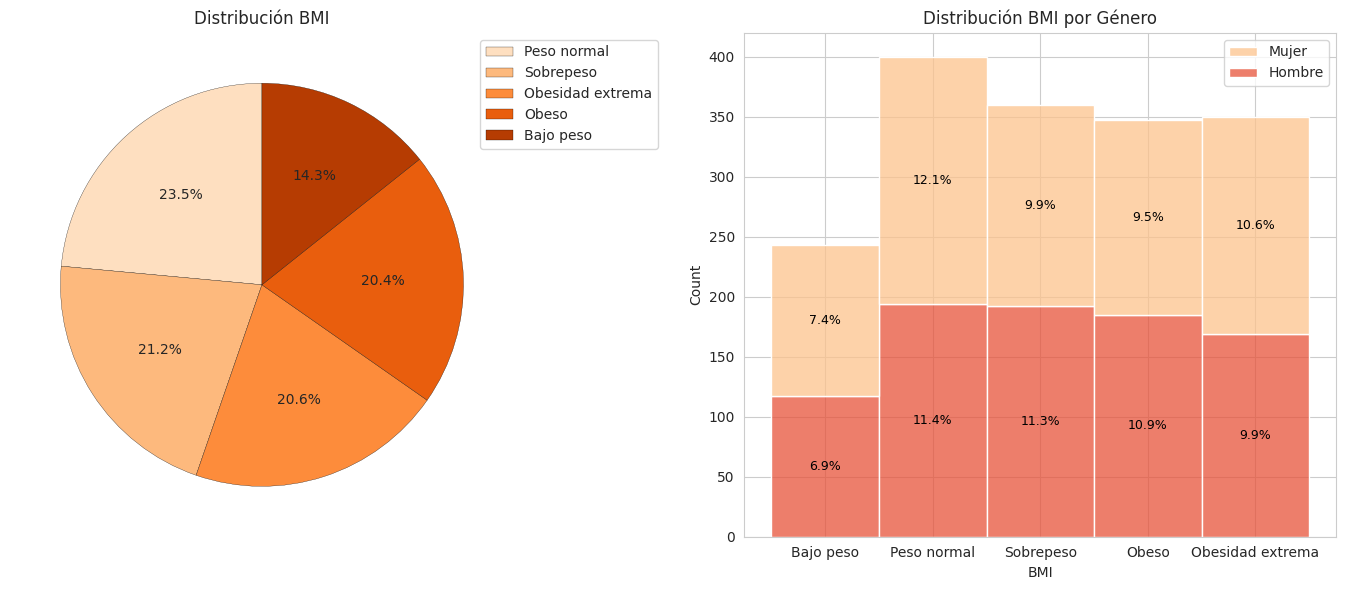

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
#Gráfico Distribución BMI
division_bmi_counts = df['DivisionBMI'].value_counts()
colors = sns.color_palette('Oranges', len(division_bmi_counts))
ax1.pie(division_bmi_counts, labels=None, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 0.2})
ax1.legend(division_bmi_counts.index, loc="upper right", bbox_to_anchor=(1.3, 1))
ax1.set_title('Distribución BMI')
#Gráfico Distribución BMI por Género
df['GenderTemp'] = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
ax2 = sns.histplot(data=df, x='DivisionBMI', hue='GenderTemp', multiple='stack', palette='OrRd', bins=30, ax=ax2)
legend = ax2.get_legend()
legend.set_title(None)

patches = ax2.patches
height_data = [p.get_height() for p in patches]
total_height = sum(height_data)

bar_data = defaultdict(lambda: {'heights': [], 'cumulative': 0})
for p in patches:
    x = p.get_x() + p.get_width() / 2
    height = p.get_height()
    if x not in bar_data:
        bar_data[x]['heights'] = []
    bar_data[x]['heights'].append(height)
    bar_data[x]['cumulative'] += height
for x, data in bar_data.items():
    cumulative = 0
    for height in data['heights']:
        percentage = (height / total_height) * 100
        ax2.text(x, cumulative + height / 2, f'{percentage:.1f}%',
                 ha='center', va='center', fontsize=9, color='black')
        cumulative += height

ax2.set_title('Distribución BMI por Género')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

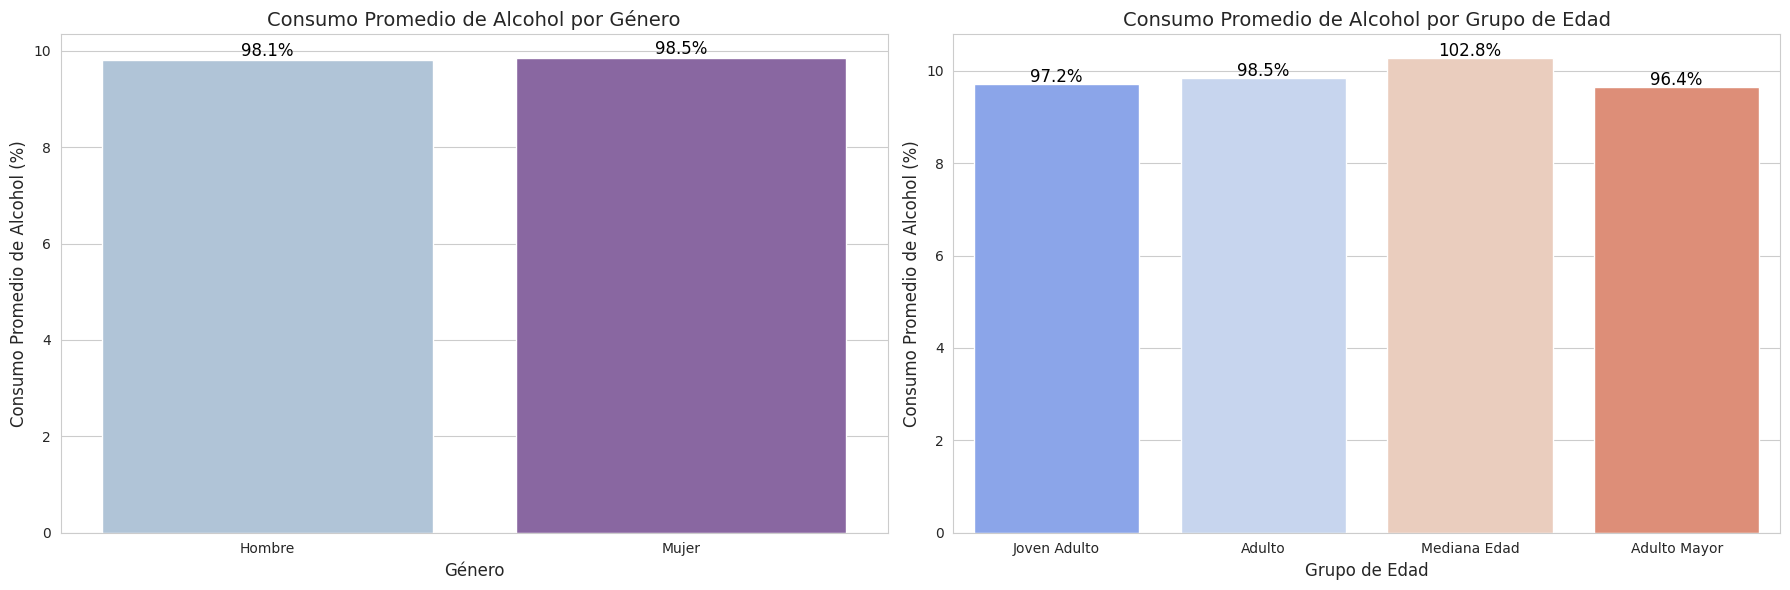

In [90]:
#Variable temporal para los géneros
gender_temp = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
avg_alcohol_by_gender = df.groupby(gender_temp)['AlcoholConsumption'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
#Gráfico de Consumo Promedio de Alcohol por Género
sns.barplot(x='Gender', y='AlcoholConsumption', data=avg_alcohol_by_gender, hue='Gender', palette='BuPu', ax=axes[0])
for index, row in avg_alcohol_by_gender.iterrows():
    percentage = row.AlcoholConsumption * 10  # Multiplicar por 100 para mostrar como porcentaje
    axes[0].text(index, row.AlcoholConsumption, f'{percentage:.1f}%', color='black',
                 ha="center", va="bottom", fontsize=12)
axes[0].set_title('Consumo Promedio de Alcohol por Género', fontsize=14)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Consumo Promedio de Alcohol (%)', fontsize=12)
#Gráfico de Consumo Promedio de Alcohol por Grupo de Edad
avg_alcohol_by_age_group = df.groupby('Age_group', observed=False)['AlcoholConsumption'].mean().reset_index()
sns.barplot(data=avg_alcohol_by_age_group, x='Age_group', y='AlcoholConsumption', hue='Age_group', palette='coolwarm', ax=axes[1])
for p in axes[1].patches:
    height = p.get_height() * 10  # Multiplicar por 100 para mostrar como porcentaje
    axes[1].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
axes[1].set_title('Consumo Promedio de Alcohol por Grupo de Edad', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Consumo Promedio de Alcohol (%)', fontsize=12)
plt.tight_layout()
plt.show()

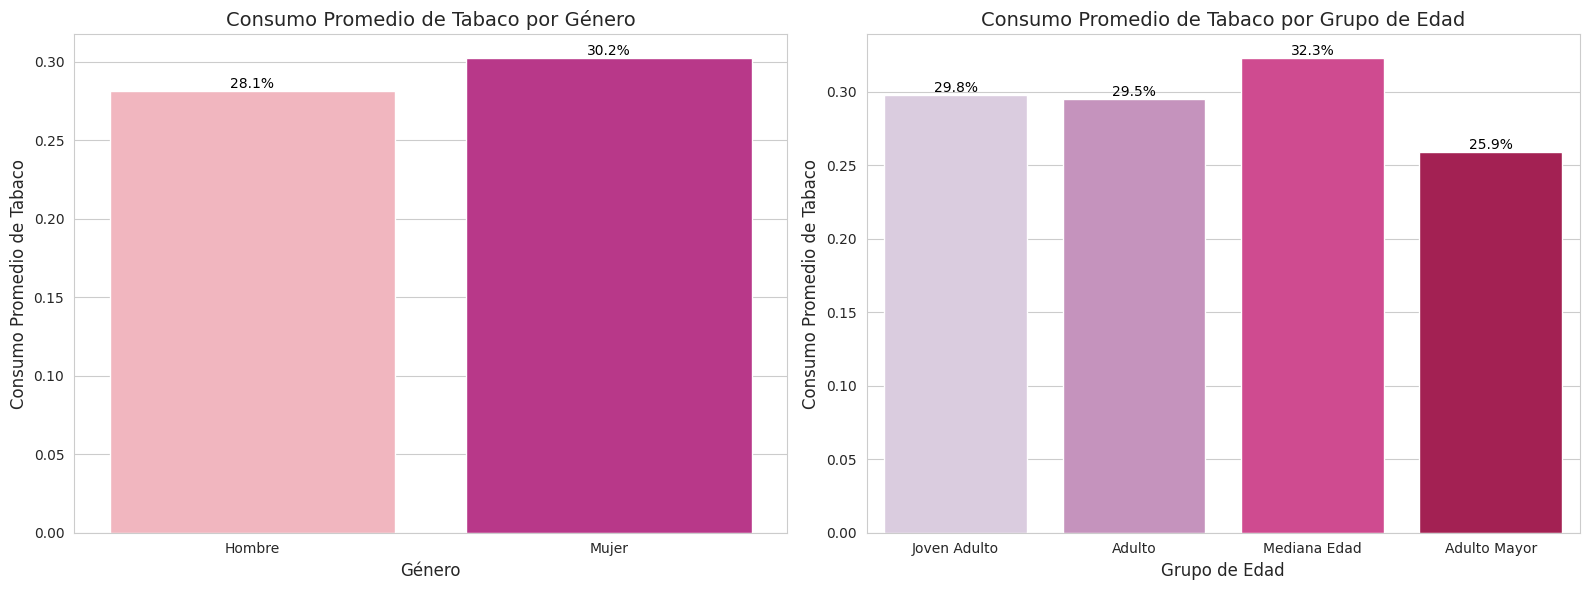

In [91]:
#Variable temporal para los géneros
gender_temp = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
avg_smoking_by_gender = df.groupby(gender_temp)['Smoking'].mean().reset_index()
df['SmokingTemp'] = df['Smoking'].replace({0: 'No', 1: 'Sí'})
avg_smoking_by_age_group = df.groupby('Age_group', observed=False)['Smoking'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#Gráfico Distribución Promedio de Consumo de Tabaco por Género
sns.barplot(x='Gender', y='Smoking', data=avg_smoking_by_gender, hue='Gender', palette='RdPu', ax=axes[0], dodge=False)
for index, row in avg_smoking_by_gender.iterrows():
    percentage = row.Smoking * 100
    axes[0].text(index, row.Smoking, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[0].set_title('Consumo Promedio de Tabaco por Género', fontsize=14)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Consumo Promedio de Tabaco', fontsize=12)
#Gráfico Consumo Promedio de Tabaco por Grupo de Edad
palette = sns.color_palette('PuRd', len(avg_smoking_by_age_group))
sns.barplot(data=avg_smoking_by_age_group, x='Age_group', y='Smoking', hue='Age_group', palette=palette, ax=axes[1], dodge=False)
for index, row in avg_smoking_by_age_group.iterrows():
    percentage = row['Smoking'] * 100
    axes[1].text(index, row.Smoking, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[1].set_title('Consumo Promedio de Tabaco por Grupo de Edad', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Consumo Promedio de Tabaco', fontsize=12)
plt.tight_layout()
plt.show()

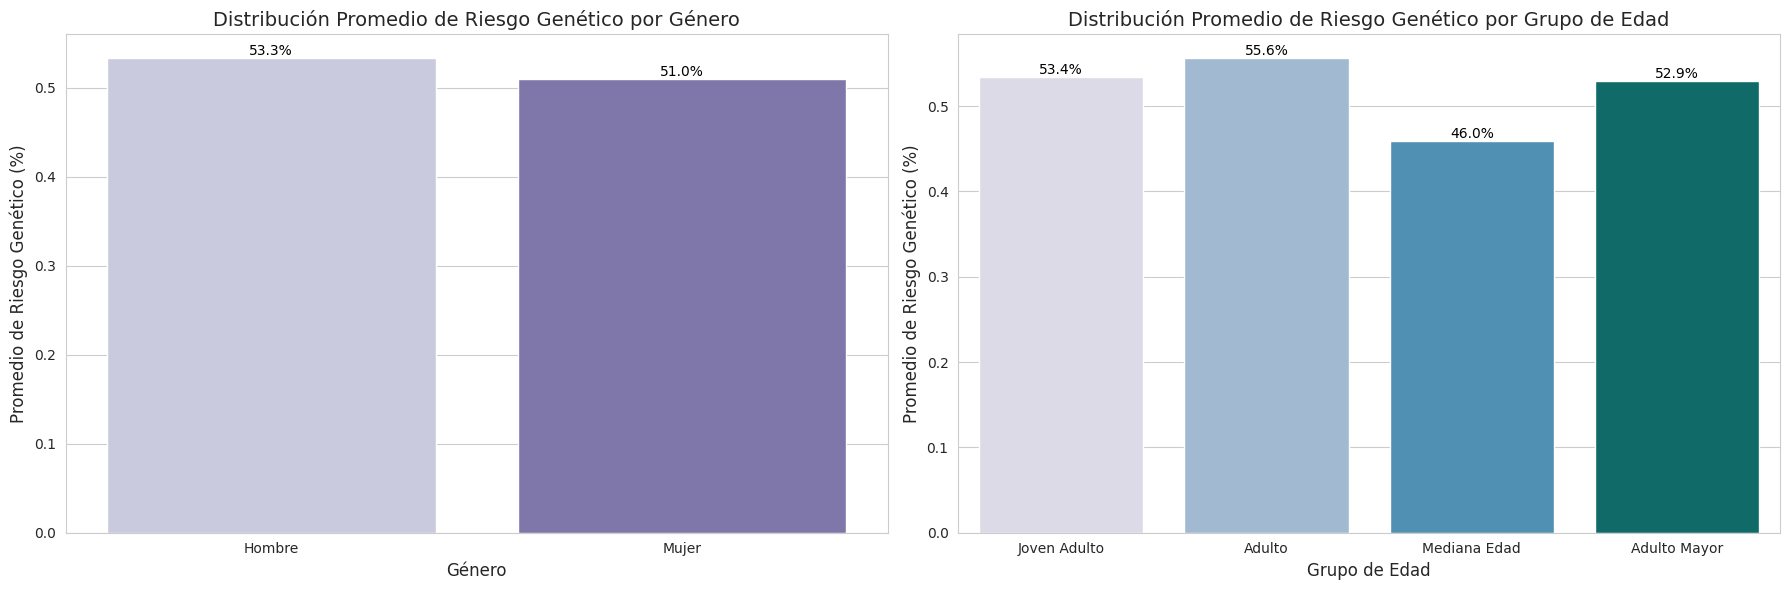

In [92]:
#Variable temporal para los géneros
gender_temp = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
avg_genetic_risk_by_gender = df.groupby(gender_temp)['GeneticRisk'].mean().reset_index()
#Variable temporal para los grupos de edad
avg_genetic_risk_by_age_group = df.groupby('Age_group', observed=True)['GeneticRisk'].mean().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
#Gráfico de Distribución Promedio de Riesgo Genético por Género
sns.barplot(x='Gender', y='GeneticRisk', data=avg_genetic_risk_by_gender, hue='Gender', palette='Purples', ax=axes[0], legend=False)
for index, row in avg_genetic_risk_by_gender.iterrows():
    percentage = row.GeneticRisk * 100
    axes[0].text(index, row.GeneticRisk, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[0].set_title('Distribución Promedio de Riesgo Genético por Género', fontsize=14)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Promedio de Riesgo Genético (%)', fontsize=12)
#Gráfico Distribución Promedio de Riesgo Genético por Grupo de Edad
palette = sns.color_palette('PuBuGn', len(avg_genetic_risk_by_age_group))
sns.barplot(data=avg_genetic_risk_by_age_group, x='Age_group', y='GeneticRisk', hue='Age_group', palette=palette, ax=axes[1], legend=False)
for index, row in avg_genetic_risk_by_age_group.iterrows():
    percentage = row.GeneticRisk * 100
    axes[1].text(index, row.GeneticRisk, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[1].set_title('Distribución Promedio de Riesgo Genético por Grupo de Edad', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Promedio de Riesgo Genético (%)', fontsize=12)
plt.tight_layout()
plt.show()

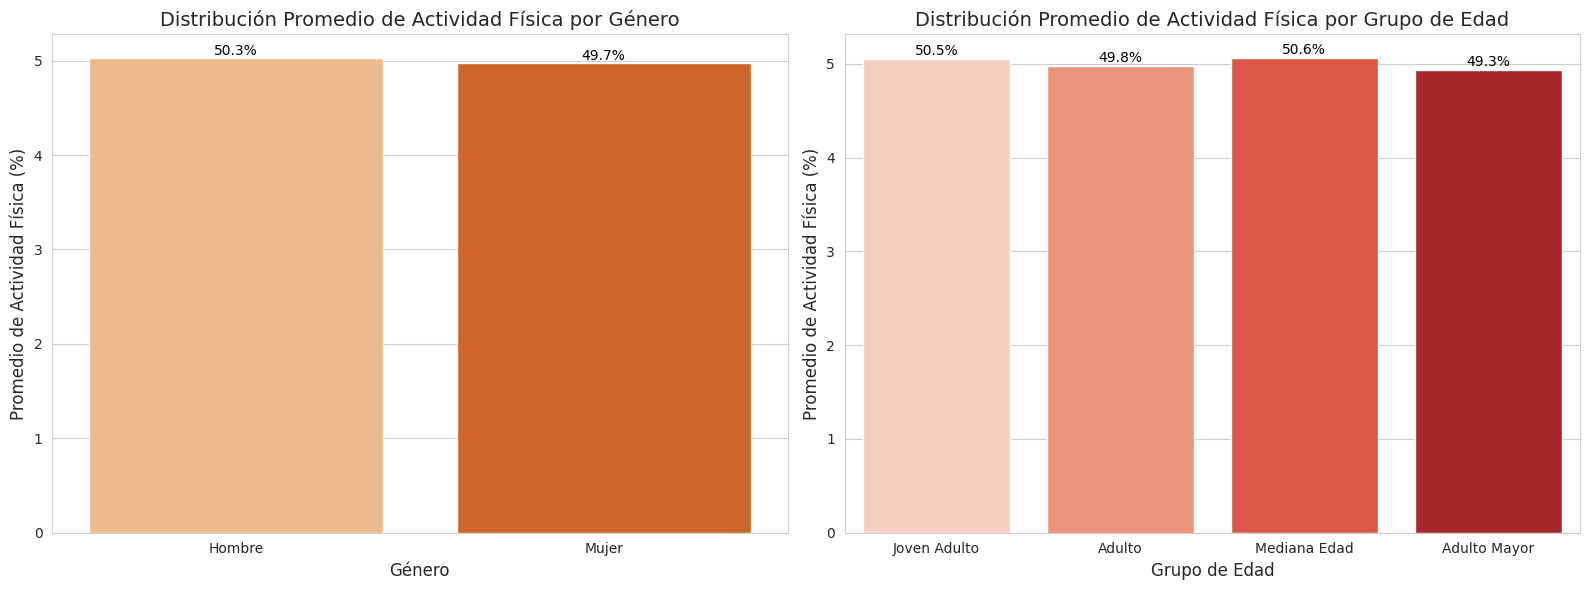

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#Gráfico Distribución Promedio de Actividad Física por Género
gender_temp = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
avg_physical_activity_by_gender = df.groupby(gender_temp)['PhysicalActivity'].mean().reset_index()
sns.barplot(x='Gender', y='PhysicalActivity', data=avg_physical_activity_by_gender,
            hue='Gender', palette='Oranges', legend=False, ax=axes[0])
for index, row in avg_physical_activity_by_gender.iterrows():
    percentage = row.PhysicalActivity * 10
    axes[0].text(index, row.PhysicalActivity, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[0].set_title('Distribución Promedio de Actividad Física por Género', fontsize=14)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Promedio de Actividad Física (%)', fontsize=12)
#Gráfico Distribución Promedio de Actividad Física por Grupo de Edad
avg_physical_activity_by_age_group = df.groupby('Age_group', observed=False)['PhysicalActivity'].mean().reset_index()
palette = sns.color_palette('Reds', len(avg_physical_activity_by_age_group))
sns.barplot(data=avg_physical_activity_by_age_group, x='Age_group', y='PhysicalActivity', hue='Age_group',
            palette=palette, legend=False, ax=axes[1])
for index, row in avg_physical_activity_by_age_group.iterrows():
    percentage = row.PhysicalActivity * 10
    axes[1].text(index, row.PhysicalActivity + 0.01, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[1].set_title('Distribución Promedio de Actividad Física por Grupo de Edad', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Promedio de Actividad Física (%)', fontsize=12)
plt.tight_layout()
plt.show()

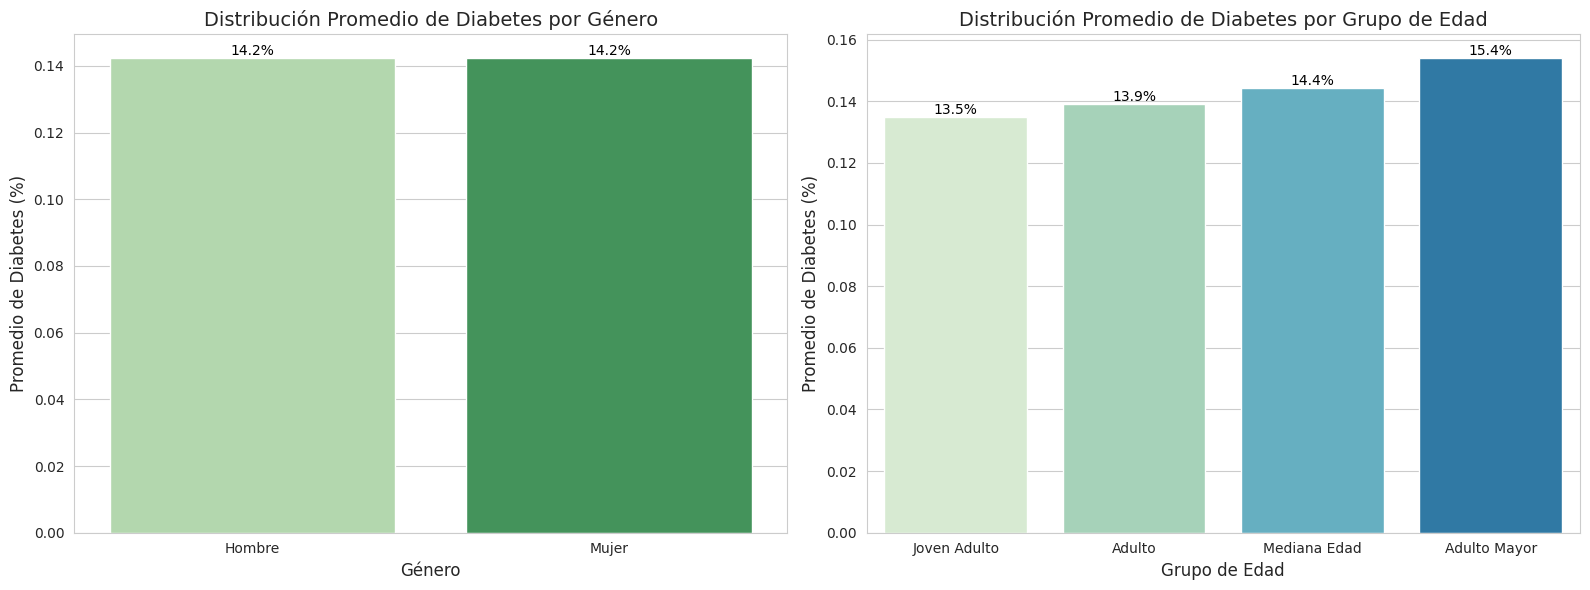

In [94]:
#Variable temporal para los géneros
gender_temp = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
avg_diabetes_by_gender = df.groupby(gender_temp)['Diabetes'].mean().reset_index()
avg_diabetes_by_age_group = df.groupby('Age_group', observed=True)['Diabetes'].mean().reset_index()

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
#Gráfico Distribución Promedio de Diabetes por Género
sns.barplot(x='Gender', y='Diabetes', data=avg_diabetes_by_gender, hue='Gender', palette='Greens', ax=axes[0], legend=False)
for index, row in avg_diabetes_by_gender.iterrows():
    percentage = row.Diabetes * 100
    axes[0].text(index, row.Diabetes, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[0].set_title('Distribución Promedio de Diabetes por Género', fontsize=14)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Promedio de Diabetes (%)', fontsize=12)
#Gráfico Distribución Promedio de Diabetes por Grupo de Edad
palette = sns.color_palette('GnBu', len(avg_diabetes_by_age_group))
sns.barplot(data=avg_diabetes_by_age_group, x='Age_group', y='Diabetes', hue='Age_group', palette=palette, ax=axes[1], legend=False)
for index, row in avg_diabetes_by_age_group.iterrows():
    percentage = row.Diabetes * 100
    axes[1].text(index, row.Diabetes, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[1].set_title('Distribución Promedio de Diabetes por Grupo de Edad', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Promedio de Diabetes (%)', fontsize=12)
plt.tight_layout()
plt.show()

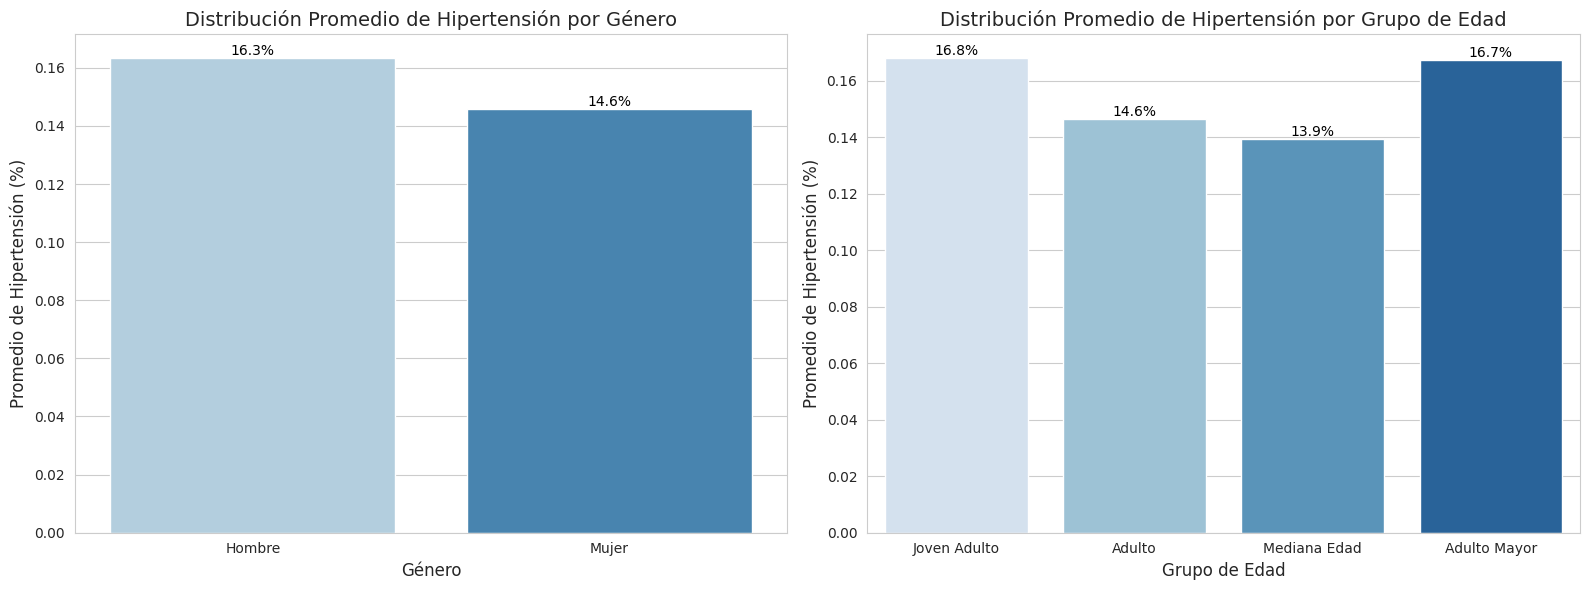

In [95]:
#Variable temporal para los géneros
gender_temp = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
avg_hypertension_by_gender = df.groupby(gender_temp)['Hypertension'].mean().reset_index()
avg_hypertension_by_age_group = df.groupby('Age_group', observed=True)['Hypertension'].mean().reset_index()

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
#Gráfico Distribución Promedio de Hypertension por Género
sns.barplot(x='Gender', y='Hypertension', data=avg_hypertension_by_gender, hue='Gender', palette='Blues', ax=axes[0], legend=False)
for index, row in avg_hypertension_by_gender.iterrows():
    percentage = row.Hypertension * 100
    axes[0].text(index, row.Hypertension, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[0].set_title('Distribución Promedio de Hipertensión por Género', fontsize=14)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Promedio de Hipertensión (%)', fontsize=12)
#Gráfico Distribución Promedio de Hypertension por Grupo de Edad
palette = sns.color_palette('Blues', len(avg_hypertension_by_age_group))
sns.barplot(data=avg_hypertension_by_age_group, x='Age_group', y='Hypertension', hue='Age_group', palette=palette, ax=axes[1], legend=False)
for index, row in avg_hypertension_by_age_group.iterrows():
    percentage = row.Hypertension * 100
    axes[1].text(index, row.Hypertension, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[1].set_title('Distribución Promedio de Hipertensión por Grupo de Edad', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Promedio de Hipertensión (%)', fontsize=12)
plt.tight_layout()
plt.show()

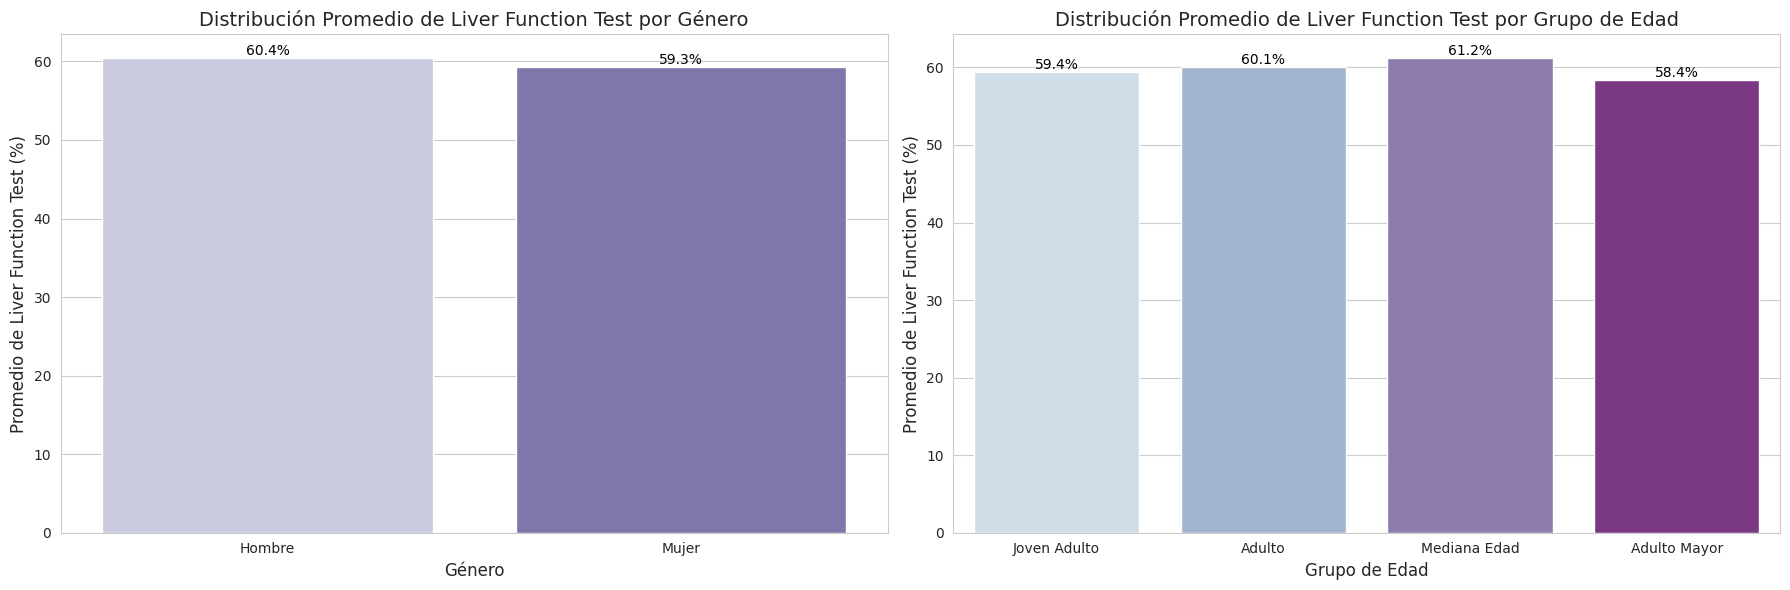

In [96]:
#Variable temporal para los géneros
gender_temp = df['Gender'].replace({0: 'Mujer', 1: 'Hombre'})
avg_liver_function_by_gender = df.groupby(gender_temp)['LiverFunctionTest'].mean().reset_index()
avg_liver_function_by_age_group = df.groupby('Age_group', observed=True)['LiverFunctionTest'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
#Gráfico Distribución Promedio de Liver Function Test por Género
sns.barplot(x='Gender', y='LiverFunctionTest', data=avg_liver_function_by_gender, hue='Gender', palette='Purples', ax=axes[0], legend=False)
for index, row in avg_liver_function_by_gender.iterrows():
    percentage = row.LiverFunctionTest * 1
    axes[0].text(index, row.LiverFunctionTest, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[0].set_title('Distribución Promedio de Liver Function Test por Género', fontsize=14)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Promedio de Liver Function Test (%)', fontsize=12)
#Gráfico Distribución Promedio de Liver Function Test por Grupo de Edad
palette = sns.color_palette('BuPu', len(avg_liver_function_by_age_group))
sns.barplot(data=avg_liver_function_by_age_group, x='Age_group', y='LiverFunctionTest', hue='Age_group', palette=palette, ax=axes[1], legend=False)
for index, row in avg_liver_function_by_age_group.iterrows():
    percentage = row.LiverFunctionTest * 1
    axes[1].text(index, row.LiverFunctionTest, f'{percentage:.1f}%', color='black', ha="center", va="bottom", fontsize=10)
axes[1].set_title('Distribución Promedio de Liver Function Test por Grupo de Edad', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('Promedio de Liver Function Test (%)', fontsize=12)
plt.tight_layout()
plt.show()

In [97]:
df.head()

,Age,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Age_group,GenderTemp,DivisionBMI,SmokingTemp
0,58,0,17.272828,0,1,0.658940,0,0,42.734240,1,Mediana Edad,Mujer,Obesidad extrema,No
1,71,1,2.201266,0,1,1.670557,1,0,67.309822,1,Adulto Mayor,Hombre,Obeso,No
2,48,0,18.500944,0,0,9.928308,0,0,63.738956,0,Adulto,Mujer,Peso normal,No
3,34,1,12.632870,0,0,5.630129,0,0,64.555873,1,Joven Adulto,Hombre,Bajo peso,No
4,62,1,1.087815,0,1,3.566218,1,0,77.868689,1,Mediana Edad,Hombre,Bajo peso,No


###Codificación Ordinal

In [98]:
df = df.drop(columns= 'Age')
df.columns

Index(['Gender', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis', 'Age_group', 'GenderTemp', 'DivisionBMI', 'SmokingTemp'],
      dtype='object')

In [99]:
df['Age_group'].value_counts()

,count
Age_group,
Adulto Mayor,448
Adulto,417
Mediana Edad,409
Joven Adulto,393


In [100]:
print(df['Age_group'].dtype)

category


In [101]:
df['Age_group'] = df['Age_group'].cat.rename_categories({'Joven Adulto': 0, 'Adulto': 1, 'Mediana Edad': 2, 'Adulto Mayor': 3})
print(df['Age_group'].dtype)

category


In [102]:
df.isna().sum()

,0
Gender,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0
Diagnosis,0
Age_group,33


>Los valores nulos de la columna 'Age_group' se imputarán con la mediana.

In [103]:
df['GenderTemp'].value_counts()

,count
GenderTemp,
Hombre,857
Mujer,843


In [104]:
print(df['GenderTemp'].dtype)

object


In [105]:
df['GenderTemp'] = df['GenderTemp'].astype(str).replace({'Hombre': '1', 'Mujer': '0'}).astype(int)
print(df['GenderTemp'].dtype)

int64


In [106]:
df['DivisionBMI'].value_counts()

,count
DivisionBMI,
Peso normal,400
Sobrepeso,360
Obesidad extrema,350
Obeso,347
Bajo peso,243


In [107]:
print(df['DivisionBMI'].dtype)

category


In [108]:
df['DivisionBMI'] = df['DivisionBMI'].cat.rename_categories({'Bajo peso': 0, 'Peso normal': 1, 'Sobrepeso': 2, 'Obeso': 3, 'Obesidad extrema': 4})
print(df['DivisionBMI'].dtype)

category


In [109]:
df['SmokingTemp'].value_counts()

,count
SmokingTemp,
No,1204
Sí,496


In [110]:
print(df['SmokingTemp'].dtype)

object


In [111]:
df['SmokingTemp'] = df['SmokingTemp'].astype(str).replace({'Sí': '1', 'No': '0'}).astype(int)
print(df['SmokingTemp'].dtype)

int64


In [112]:
df.head()

,Gender,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Age_group,GenderTemp,DivisionBMI,SmokingTemp
0,0,17.272828,0,1,0.658940,0,0,42.734240,1,2,0,4,0
1,1,2.201266,0,1,1.670557,1,0,67.309822,1,3,1,3,0
2,0,18.500944,0,0,9.928308,0,0,63.738956,0,1,0,1,0
3,1,12.632870,0,0,5.630129,0,0,64.555873,1,0,1,0,0
4,1,1.087815,0,1,3.566218,1,0,77.868689,1,2,1,0,0


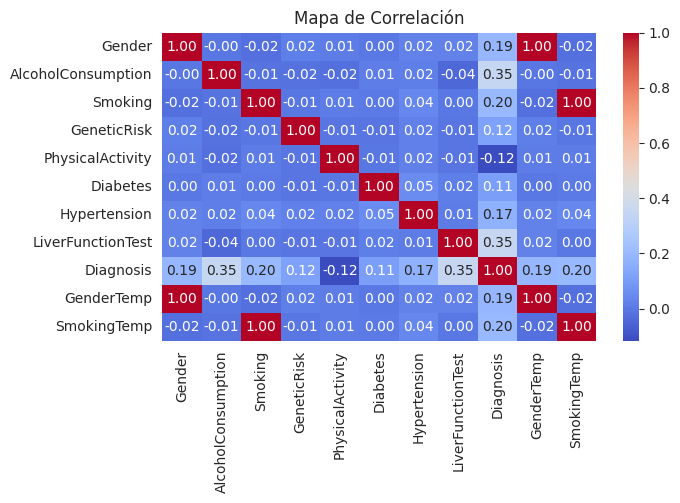

In [113]:
#Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])
#Calcular la correlación solo con variables numéricas
corr = df_numeric.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación')
plt.show()

>El objetivo 'Diagnosis' muestra baja correlación con las otras características.

>La más alta es con LiverFunctionTest y AlcoholConsumption (ambas con 0.35) y luego  Smoking con 0.20, y Hypertension con 0.17.

###Modelos Predictivos

In [114]:
y = df['Diagnosis']
X = df.drop(columns= 'Diagnosis')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [115]:
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [116]:
preprocessor = make_pipeline(median_imputer, scaler)
preprocessor

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [117]:
preprocessor.fit(X_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [118]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [119]:
print(np.isnan(X_train_processed).sum().sum(), 'valores faltantes en X_train_processed \n')
print(np.isnan(X_test_processed).sum().sum(), 'valores faltantes en X_test_processed \n')

0 valores faltantes en X_train_processed 

0 valores faltantes en X_test_processed 



####Modelo Decision Tree

In [120]:
dec = DecisionTreeClassifier(random_state=42)
dec_pipe = make_pipeline(preprocessor, dec)

In [121]:
dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [122]:
train_score = dec_pipe.score(X_train, y_train)
print(train_score)
test_score = dec_pipe.score(X_test, y_test)
print(test_score)

1.0
0.84


####Modelo Random Forest

In [123]:
rf = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(preprocessor, rf)

In [124]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [125]:
train_score = rf_pipe.score(X_train, y_train)
print(train_score)
test_score = rf_pipe.score(X_test, y_test)
print(test_score)

1.0
0.9035294117647059


####Modelo Gradient Boosting

In [126]:
gb = GradientBoostingClassifier(random_state=42)
gb_pipe = make_pipeline(preprocessor, gb)

In [127]:
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [128]:
train_score = gb_pipe.score(X_train, y_train)
print(train_score)
test_score = gb_pipe.score(X_test, y_test)
print(test_score)

0.9552941176470588
0.9105882352941177


####Modelo KNN

In [129]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)

In [130]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [131]:
train_score = knn_pipe.score(X_train, y_train)
print(train_score)
test_score = knn_pipe.score(X_test, y_test)
print(test_score)

0.8854901960784314
0.8305882352941176


####Modelo Gradient Boosting con GridSearch

In [132]:
gb = GradientBoostingClassifier(random_state=42)
gb_gs_pipe = make_pipeline(preprocessor, gb)

In [133]:
gb_gs_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [134]:
param_grid = {
    'gradientboostingclassifier__n_estimators': [50, 100, 150, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 4, 5, 6]}
grid_search = GridSearchCV(gb_gs_pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('standardscaler',
                                                         StandardScaler())])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.05,
                                                                       0.1,
                                                                       0.2],
                         'gradientboostingclassifier__max_depth': [3, 4, 5, 6],
                         'gradientboostingclassifier__n_estimators': [50, 100,
                                                                      150, 200,
                                                                      300]},
             scoring='accuracy', verbose=1)

In [135]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9011764705882352


In [136]:
train_score = gb_gs_pipe.score(X_train, y_train)
print(train_score)
test_score = gb_gs_pipe.score(X_test, y_test)
print(test_score)

0.9552941176470588
0.9105882352941177


###Métricas Modelos

In [137]:
models = [dec_pipe, rf_pipe, gb_pipe, gb_gs_pipe]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Gradient Boosting GridSearch']
metrics_dict = {}
confusion_dict = {}

for model_name, model in zip(model_names, models):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    accuracy_train_rounded = round(accuracy_train, 2)
    recall_train_rounded = round(recall_train, 2)
    precision_train_rounded = round(precision_train, 2)
    f1_train_rounded = round(f1_train, 2)

    accuracy_test_rounded = round(accuracy_test, 2)
    recall_test_rounded = round(recall_test, 2)
    precision_test_rounded = round(precision_test, 2)
    f1_test_rounded = round(f1_test, 2)

    metrics_df = pd.DataFrame({
        'Train': [accuracy_train_rounded, recall_train_rounded, precision_train_rounded, f1_train_rounded],
        'Test': [accuracy_test_rounded, recall_test_rounded, precision_test_rounded, f1_test_rounded]
    }, index=['Accuracy', 'Recall', 'Precision', 'F1'])

    metrics_dict[model_name] = metrics_df

#Matriz de Confusión
    confusion_test = confusion_matrix(y_test, y_test_pred)

    confusion_dict[model_name] = {
        'Test': confusion_test}

for model_name, metrics_df in metrics_dict.items():
    print(f"Métricas {model_name}")
    print(metrics_df.transpose())
    print("\n")

for model_name, confusion_matrices in confusion_dict.items():
    print(f"Matriz de Confusión {model_name}")
    print(confusion_matrices['Test'])
    print("\n")

Métricas Decision Tree
       Accuracy  Recall  Precision    F1
Train      1.00    1.00       1.00  1.00
Test       0.84    0.86       0.85  0.85


Métricas Random Forest
       Accuracy  Recall  Precision    F1
Train       1.0    1.00        1.0  1.00
Test        0.9    0.93        0.9  0.91


Métricas Gradient Boosting
       Accuracy  Recall  Precision    F1
Train      0.96    0.97       0.95  0.96
Test       0.91    0.93       0.91  0.92


Métricas Gradient Boosting GridSearch
       Accuracy  Recall  Precision    F1
Train      0.96    0.97       0.95  0.96
Test       0.91    0.93       0.91  0.92


Matriz de Confusión Decision Tree
[[158  35]
 [ 33 199]]


Matriz de Confusión Random Forest
[[169  24]
 [ 17 215]]


Matriz de Confusión Gradient Boosting
[[171  22]
 [ 16 216]]


Matriz de Confusión Gradient Boosting GridSearch
[[171  22]
 [ 16 216]]




###Modelo Recomendado

El modelo Gradient Boosting, con y sin ajuste de hiperparámetros, es el más adecuado para la predicción de enfermedades hepáticas, según sus métricas de evaluación.

Su Accuracy del 91% indica una alta capacidad para clasificar correctamente tanto a pacientes sanos como enfermos. El Recall del 93% es fundamental en contextos clínicos, ya que garantiza que la mayoría de los pacientes enfermos sean correctamente identificados, minimizando falsos negativos que podrían dejar a personas sin diagnóstico ni tratamiento.

Además, su Precision del 91% demuestra que el modelo identifica casos positivos con alta certeza, evitando etiquetar erróneamente a personas sanas como si tuvieran la enfermedad. El F1 Score de 92% confirma un balance robusto entre Recall y Precision, lo que respalda su fiabilidad en la detección temprana de enfermedades hepáticas.

La matriz de confusión también refleja este buen desempeño, mostrando una baja cantidad de falsos negativos y positivos.

Por sus resultados consistentes, Gradient Boosting es el modelo con mejor rendimiento y confiabilidad para este problema.